<a href="https://colab.research.google.com/github/AliS1920/clustering_music/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pregunta de Investigación: ¿Cómo se relacionan las temáticas y las emociones de los comentarios del hilo de Reddit "Just because you listen to less popular music doesn't mean you have a better taste." ?

Objetivos:
1. Identificar las emociones en las oraciones del sitio web.
2. Crear clusters a partir de las temáticas de los comentarios.
2. Identificar las emociones principales de cada uno de los clusters.



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"comr.csv")
df

,Unnamed: 0,Unnamed: 1,Author,Date,Votes UP,Votes Down,Score,Message,isPremium,Summary,Profile Url,Profile Image
0,1,NaN,Pottatothegreat1985,2020-05-04 03:11:03,29496,0,29496,Just because you listen to less popular music ...,no,Author: Pottatothegreat1985 | Score: 29496 | V...,https://www.reddit.com/user/Pottatothegreat1985/,NaN
1,2,NaN,EggUnicorn,2020-05-04 03:14:20,316,0,316,"Music taste is completely subjective, so I com...",no,NaN,https://www.reddit.com/user/EggUnicorn/,https://styles.redditmedia.com/t5_2cgfng/style...
2,3,NaN,j4k3o,2020-05-04 03:52:26,2398,0,2398,I love a lot of Nirvana songs. I'm not worried...,no,NaN,https://www.reddit.com/user/j4k3o/,https://styles.redditmedia.com/t5_2ak42r/style...
3,4,NaN,karlnite,2020-05-04 04:36:08,584,0,584,I like their MTV unplugged album but that’s ab...,no,NaN,https://www.reddit.com/user/karlnite/,https://styles.redditmedia.com/t5_583oh/styles...
4,5,NaN,peculiarnewbie,2020-05-04 04:39:53,15,0,15,As long as you have an open mind and try to ap...,no,NaN,https://www.reddit.com/user/peculiarnewbie/,https://styles.redditmedia.com/t5_6uiy1/styles...
...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,NaN,Luke7787,2020-05-25 20:18:52,1,0,1,So You can chill for a long time lol,no,NaN,https://www.reddit.com/user/Luke7787/,https://www.redditstatic.com/avatars/defaults/...
189,190,NaN,contradel,2020-05-30 19:49:07,0,0,0,"**""Just because you listen to less popular mus...",no,NaN,https://www.reddit.com/user/contradel/,https://www.redditstatic.com/avatars/defaults/...
190,191,NaN,Yayihaveanaccount,2020-05-31 23:58:04,1,0,1,"I don't think I have a better taste in music, ...",no,NaN,https://www.reddit.com/user/Yayihaveanaccount/,https://styles.redditmedia.com/t5_llang/styles...
191,192,NaN,GI_X_JACK,2020-07-11 01:36:02,1,0,1,Imagine getting this worked up over radio bang...,no,NaN,https://www.reddit.com/user/GI_X_JACK/,https://www.redditstatic.com/avatars/defaults/...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     193 non-null    int64  
 1   Unnamed: 1     0 non-null      float64
 2   Author         193 non-null    object 
 3   Date           193 non-null    object 
 4   Votes UP       193 non-null    int64  
 5   Votes Down     193 non-null    int64  
 6   Score          193 non-null    int64  
 7   Message        193 non-null    object 
 8   isPremium      193 non-null    object 
 9   Summary        1 non-null      object 
 10  Profile Url    193 non-null    object 
 11  Profile Image  155 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 18.2+ KB


In [ ]:
df=df.drop(columns=['Author','Date','Votes UP','Votes Down','Score','isPremium','Summary', 'Profile Url', 'Profile Image','Unnamed: 1'])
df.head(5)

,Unnamed: 0,Message
0,1,Just because you listen to less popular music ...
1,2,"Music taste is completely subjective, so I com..."
2,3,I love a lot of Nirvana songs. I'm not worried...
3,4,I like their MTV unplugged album but that’s ab...
4,5,As long as you have an open mind and try to ap...


Preprocesamiento

In [ ]:
!pip install spacy
!python -m spacy download es_core_news_sm

In [ ]:
#librerias
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string
import es_core_news_sm

nltk.download('punkt')
nltk.download('punk_tab')
nltk.download('stopwords')
nlp = es_core_news_sm.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading punk_tab: Package 'punk_tab' not found in
[nltk_data]     index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 1. Instala el modelo de inglés
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
english_stopwords = set(stopwords.words('english'))
#stemmer = SnowballStemmer('english')


In [ ]:
#LIMPIAR DATOS

#1: pasar todo a minusculas
df['text'] = df['Message'].str.lower()

In [ ]:
#2. tokenizar con spacy
def tokenize_spacy(text):
    doc = nlp(text)
    return [token.text for token in doc]

In [ ]:
#tokenizar
df['text'] = df['text'].apply(tokenize_spacy)

In [ ]:
#3: eliminar puntuacion (solo tokens alfanumericos)
df['text'] = df['text'].apply(lambda tokens: [word for word in tokens if word.isalnum()])

In [ ]:
#4: stopwords
df['text'] = df['text'].apply(lambda tokens: [word for word in tokens if word not in english_stopwords])

In [ ]:
#5: lematizar (mejor que stem porque importa el contexto)
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

In [ ]:
df['text'] = df['text'].apply(lemmatize_tokens)

In [ ]:
#6: unir los tokens procesados 1 string
df['text'] = df['text'].apply(lambda tokens: " ".join(tokens))

In [ ]:
#VECTORIZAR
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])


In [ ]:
df.head(5)

,Unnamed: 0,Message,text
0,1,Just because you listen to less popular music ...,listir less popular music mear better taste
1,2,"Music taste is completely subjective, so I com...",music taste completely subjectivar completely ...
2,3,I love a lot of Nirvana songs. I'm not worried...,lovar lot nirvana songs worried liking less po...
3,4,I like their MTV unplugged album but that’s ab...,like mtv unplugged album
4,5,As long as you have an open mind and try to ap...,long opir mind try apreciate kinds music say g...


In [ ]:
df=df.drop(columns=['Message'])
df.head(5)

,Unnamed: 0,text
0,1,listir less popular music mear better taste
1,2,music taste completely subjectivar completely ...
2,3,lovar lot nirvana songs worried liking less po...
3,4,like mtv unplugged album
4,5,long opir mind try apreciate kinds music say g...


In [ ]:
df.to_csv("com_procesados.csv", index=False)
from google.colab import files
files.download("com_procesados.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Crear clusters a partir de las temáticas de los comentarios.


In [ ]:
import pandas as pd
dfa = pd.read_csv("com_procesados.csv")

In [ ]:
dfa.head(5)

,Unnamed: 0,text
0,1,listir less popular music mear better taste
1,2,music taste completely subjectivar completely ...
2,3,lovar lot nirvana songs worried liking less po...
3,4,like mtv unplugged album
4,5,long opir mind try apreciate kinds music say g...


In [ ]:
dfa = dfa.dropna(subset=['text'])


In [ ]:
#VECTORIZAR
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dfa['text'])


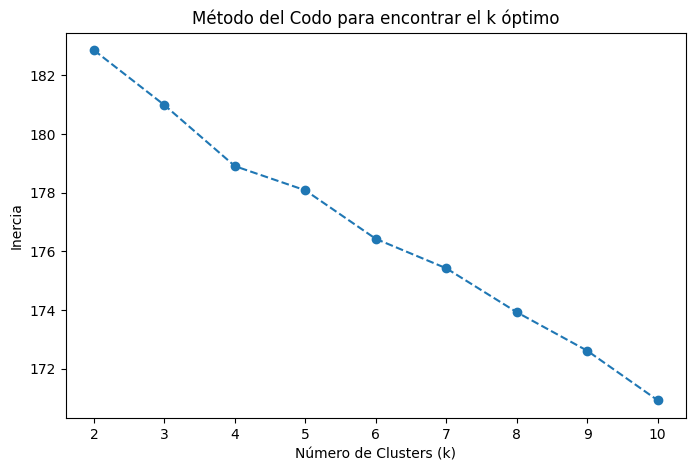

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(2, 11)  # Desde 2 hasta 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Guardar la inercia para cada k

# Graficar el método del codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el k óptimo')
plt.show()


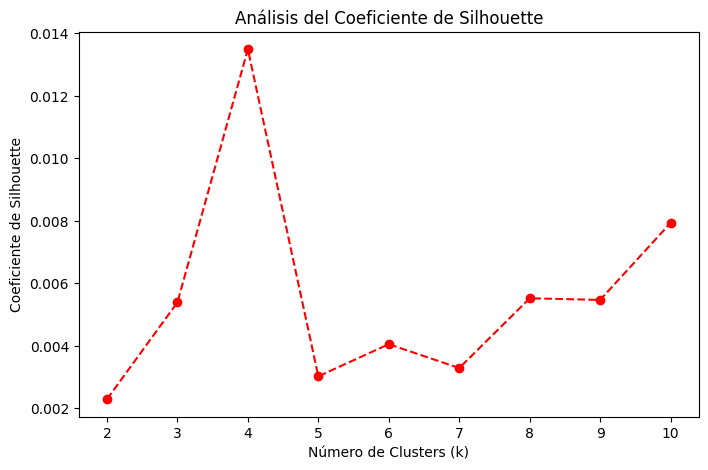

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el coeficiente de Silhouette
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Análisis del Coeficiente de Silhouette')
plt.show()


In [ ]:
#CLUSTER USANDO K_MEANS
from sklearn.cluster import KMeans

num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
dfa['cluster'] = kmeans.fit_predict(X)



In [ ]:
dfa.head()

,Unnamed: 0,text,cluster
0,1,listir less popular music mear better taste,1
1,2,music taste completely subjectivar completely ...,1
2,3,lovar lot nirvana songs worried liking less po...,4
3,4,like mtv unplugged album,0
4,5,long opir mind try apreciate kinds music say g...,5


In [ ]:
dfa.to_csv("com_clusters.csv", index=False)
from google.colab import files
files.download("com_clusters.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones para visualizar
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())  # Asegúrate de usar .toarray() si X es sparse

# También reducimos los centroides
centroids_reduced = pca.transform(kmeans.cluster_centers_)


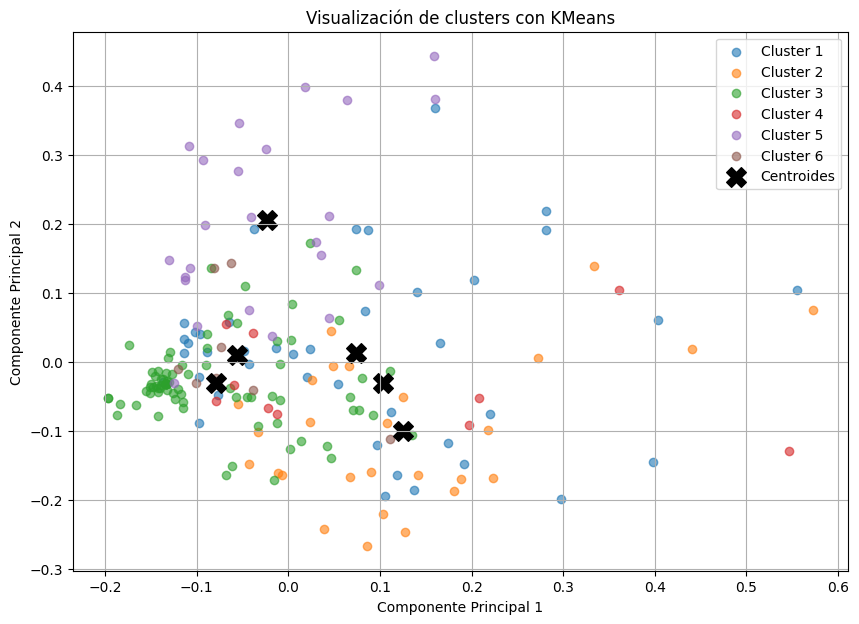

In [ ]:
plt.figure(figsize=(10, 7))
colors = plt.cm.tab10.colors  # Colores para los clusters

# Graficar cada cluster con su nombre
for i in range(num_clusters):
    puntos_cluster = X_reduced[dfa['cluster'] == i]
    plt.scatter(puntos_cluster[:, 0], puntos_cluster[:, 1],
                c=[colors[i]], label=f"Cluster {i+1}", alpha=0.6)

# Centroides en negro con X
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1],
            c='black', marker='X', s=200, label='Centroides')

plt.title("Visualización de clusters con KMeans")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_words = [terms[ind] for ind in kmeans.cluster_centers_.argsort()[:, -10:][i]]
    print(f"Cluster {i+1}: {top_words}")


Cluster 1: ['better', 'bad', 'popular', 'find', 'peoplir', 'think', 'music', 'taste', 'good', 'like']
Cluster 2: ['genre', 'less', 'listir', 'mear', 'technical', 'yes', 'taste', 'better', 'popular', 'music']
Cluster 3: ['satirar', 'enjoy', 'song', 'deleted', 'like', 'time', 'él', 'metal', 'music', 'listir']
Cluster 4: ['subreddit', 'peoplir', 'popular', 'listir', 'taste', 'fan', 'think', 'music', 'opinion', 'unpopular']
Cluster 5: ['liking', 'basic', 'spirit', 'teen', 'fan', 'ratm', 'like', 'popular', 'nirvana', 'songs']
Cluster 6: ['rap', 'sidir', 'hivar', 'anyonir', 'dark', 'moon', 'shit', 'mind', 'hate', 'peoplir']


<ipython-input-38-1d9140d5aa66>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias, y=palabras_top, palette="viridis")


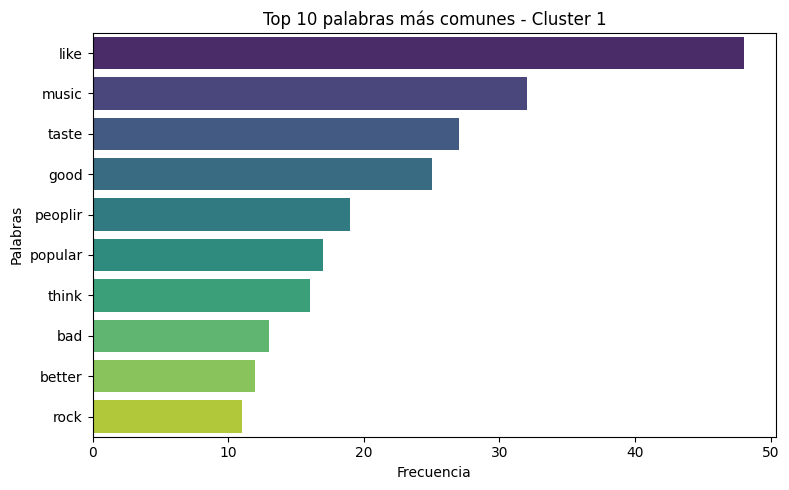

<ipython-input-38-1d9140d5aa66>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias, y=palabras_top, palette="viridis")


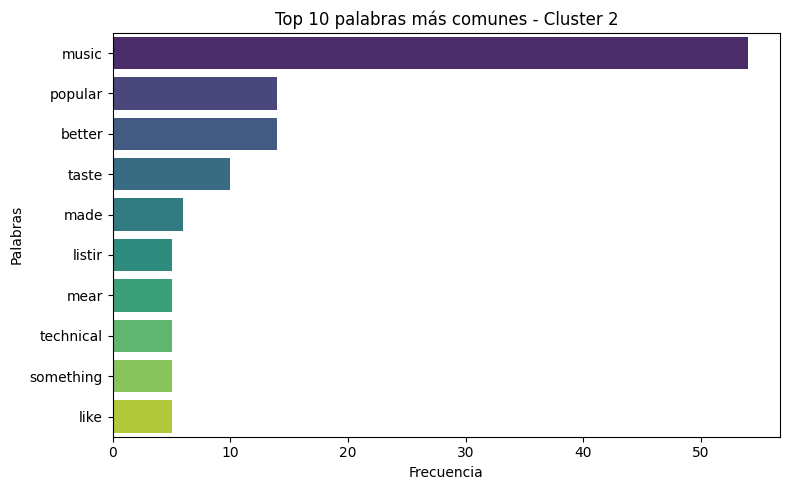

<ipython-input-38-1d9140d5aa66>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias, y=palabras_top, palette="viridis")


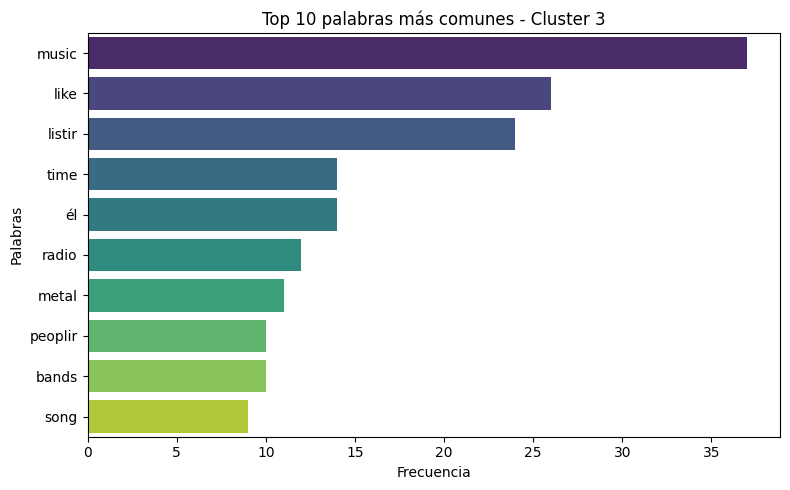

<ipython-input-38-1d9140d5aa66>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias, y=palabras_top, palette="viridis")


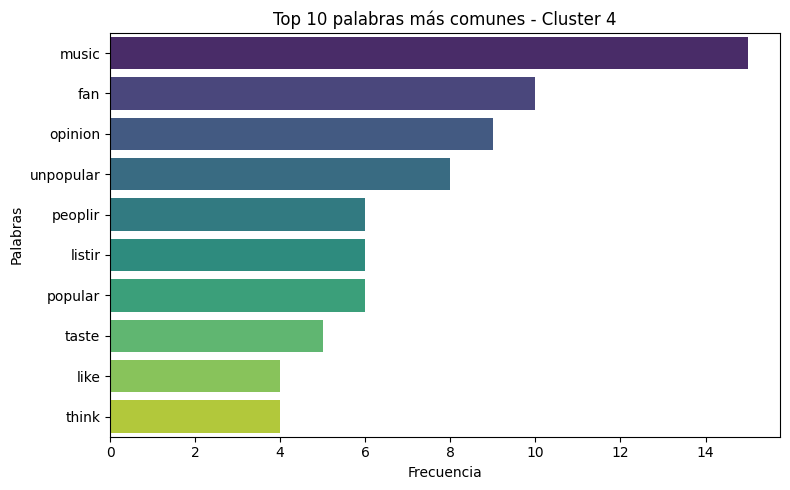

<ipython-input-38-1d9140d5aa66>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias, y=palabras_top, palette="viridis")


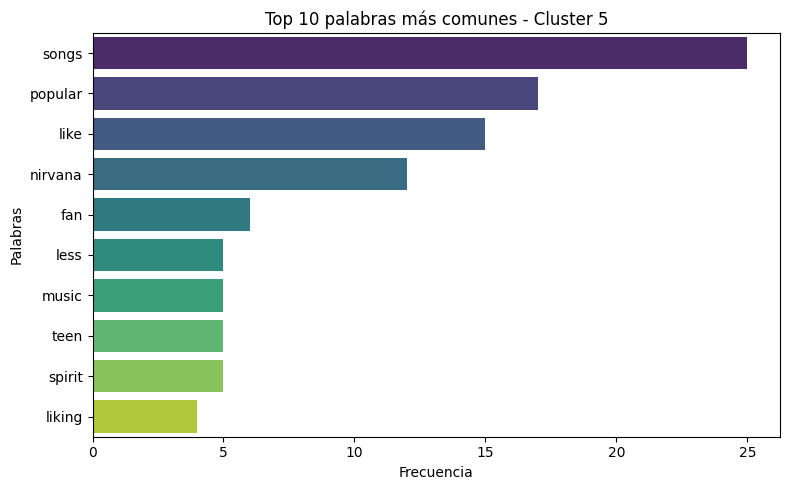

<ipython-input-38-1d9140d5aa66>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias, y=palabras_top, palette="viridis")


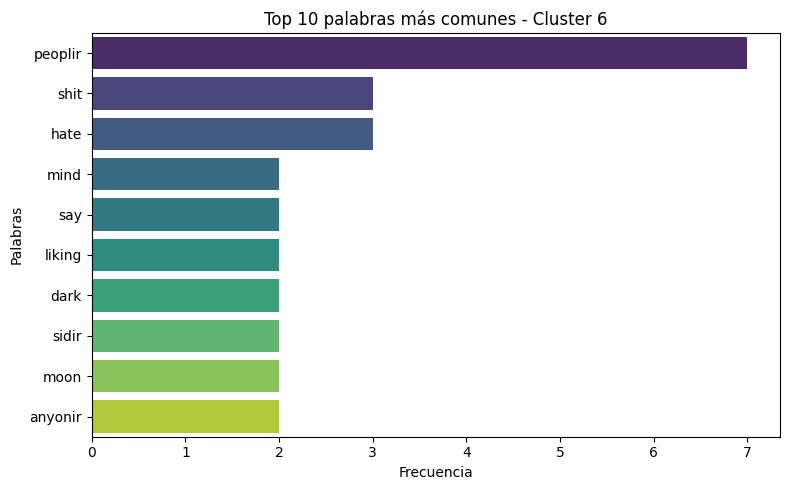

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

num_words = 10  # Número de palabras por gráfico (por cluster)

for i in range(num_clusters):
    # Filtrar los textos del cluster
    textos = dfa[dfa['cluster'] == i]['text']

    # Unir todos los textos en una sola lista de palabras
    palabras = " ".join(textos).split()

    # Contar las palabras más comunes
    palabras_comunes = Counter(palabras).most_common(num_words)

    # Separar palabras y sus frecuencias para graficar
    palabras_top = [p[0] for p in palabras_comunes]
    frecuencias = [p[1] for p in palabras_comunes]

    # Crear el gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(x=frecuencias, y=palabras_top, palette="viridis")
    plt.title(f"Top {num_words} palabras más comunes - Cluster {i+1}")
    plt.xlabel("Frecuencia")
    plt.ylabel("Palabras")
    plt.tight_layout()
    plt.show()
